In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load training data
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Training samples: {len(train_df):,}")
print(f"Test samples: {len(test_df):,}")
print(f"\nTraining columns: {list(train_df.columns)}")
print(f"Test columns: {list(test_df.columns)}")

# Check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
print(train_df.isnull().sum())

# Display first few rows
print("\n" + "=" * 60)
print("SAMPLE DATA")
print("=" * 60)
print(train_df.head())


DATASET OVERVIEW
Training samples: 75,000
Test samples: 75,000

Training columns: ['sample_id', 'catalog_content', 'image_link', 'price']
Test columns: ['sample_id', 'catalog_content', 'image_link']

MISSING VALUES
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

SAMPLE DATA
   sample_id                                    catalog_content  \
0      33127  Item Name: La Victoria Green Taco Sauce Mild, ...   
1     198967  Item Name: Salerno Cookies, The Original Butte...   
2     261251  Item Name: Bear Creek Hearty Soup Bowl, Creamy...   
3      55858  Item Name: Judee’s Blue Cheese Powder 11.25 oz...   
4     292686  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...   

                                          image_link  price  
0  https://m.media-amazon.com/images/I/51mo8htwTH...   4.89  
1  https://m.media-amazon.com/images/I/71YtriIHAA...  13.12  
2  https://m.media-amazon.com/images/I/51+PFEe-w-...   1.97  
3  https://m.media-amazo

PRICE STATISTICS
count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64


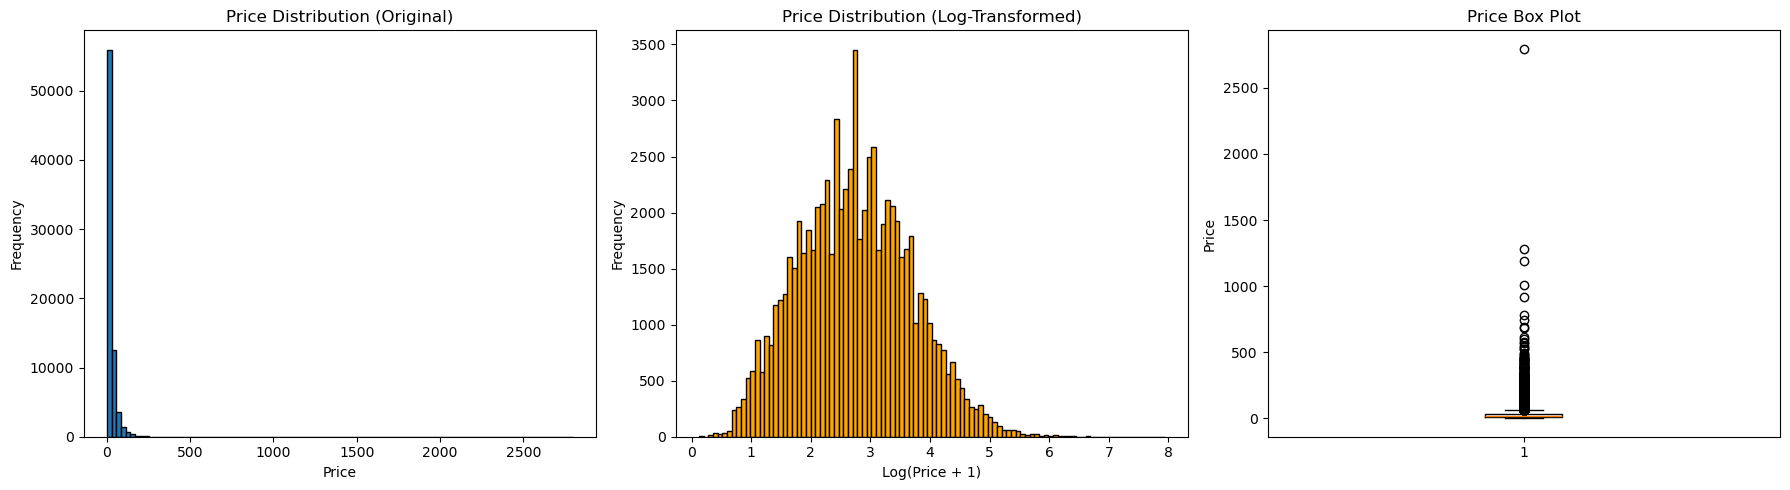


Number of price outliers: 5524 (7.37%)


In [3]:
# Price statistics
print("=" * 60)
print("PRICE STATISTICS")
print("=" * 60)
print(train_df['price'].describe())

# Price distribution plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original prices
axes[0].hist(train_df['price'], bins=100, edgecolor='black')
axes[0].set_title('Price Distribution (Original)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Log-transformed prices
axes[1].hist(np.log1p(train_df['price']), bins=100, edgecolor='black', color='orange')
axes[1].set_title('Price Distribution (Log-Transformed)')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')

# Box plot
axes[2].boxplot(train_df['price'])
axes[2].set_title('Price Box Plot')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

# Check for outliers
Q1 = train_df['price'].quantile(0.25)
Q3 = train_df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_df[(train_df['price'] < Q1 - 1.5*IQR) | (train_df['price'] > Q3 + 1.5*IQR)]
print(f"\nNumber of price outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")


In [4]:
# Analyze catalog_content field
print("=" * 60)
print("CATALOG CONTENT ANALYSIS")
print("=" * 60)

# Length statistics
train_df['content_length'] = train_df['catalog_content'].astype(str).apply(len)
print(train_df['content_length'].describe())

# Sample catalog content
print("\nSample catalog entries:")
for i in range(3):
    print(f"\n--- Sample {i+1} ---")
    print(f"Price: ${train_df.iloc[i]['price']}")
    print(f"Content: {train_df.iloc[i]['catalog_content'][:200]}...")
    print(f"Image: {train_df.iloc[i]['image_link']}")


CATALOG CONTENT ANALYSIS
count    75000.000000
mean       908.886547
std        852.896151
min         32.000000
25%        251.000000
50%        643.000000
75%       1280.000000
max       7894.000000
Name: content_length, dtype: float64

Sample catalog entries:

--- Sample 1 ---
Price: $4.890000000000001
Content: Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)
Value: 72.0
Unit: Fl Oz
...
Image: https://m.media-amazon.com/images/I/51mo8htwTHL.jpg

--- Sample 2 ---
Price: $13.12
Content: Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)
Bullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter
Bullet Point 2: Variety Pack: Include...
Image: https://m.media-amazon.com/images/I/71YtriIHAAL.jpg

--- Sample 3 ---
Price: $1.97
Content: Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)
Bullet Point 1: Loaded with hearty long grain wild rice and vegetables
Bullet Point 2: Full of hea